# 딥러닝2022 중간고사 -- 풀이

In [ ]:
import torch 
import matplotlib.pyplot as plt
from fastai.vision.all import *

## `1`. 크롤링을 통한 이미지 분석 및 CAM. (50점) -- 풀이생략

`(1)` 두 가지 키워드로 크롤링을 수행하여 이미지자료를 모아라. 
- 키워드는 {'iu','hynn'}을 제외하고 본인이 선택할 것) 

`(2)` ImageDataLoaders.from_folder 를 이용하여 dls를 만들어라.

`(3)` resnet34를 이용하여 학습하라.

`(4)` CAM (class activation mapping)을 이용하여 (3)의 모형의 판단근거를 시각화하라. 

## `2`. 다음을 읽고 물음에 답하라. (30점)

주어진 자료가 아래와 같다고 하자. 

In [ ]:
torch.manual_seed(7676)
x = torch.randn(100).sort().values
ϵ = torch.randn(100)*0.5
y = 2.5+ 4*x + ϵ

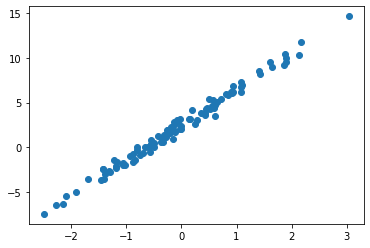

In [ ]:
plt.plot(x,y,'o')

아래와 같은 모형을 가정하고 물음에 답하라. 

$$y_i = w_0+w_1 x_i +\epsilon_i, \quad \epsilon_i \overset{iid}{\sim} N(0,\sigma^2)$$

`(1)` ??를 적당하게 채워 아래와 같은 네트워크를 설정하고 최초의 예측값이 $\hat{y}_i=-5+10x_i$가 출력되도록 net의 가중치를 조정하라. 

```python
net = torch.nn.Linear(in_features=2,out_features=??,bias=??)
```

(풀이)

In [ ]:
X = torch.stack([torch.ones_like(x), x],axis=1) 
y = y.reshape(-1,1)

In [ ]:
net = torch.nn.Linear(in_features=2,out_features=1,bias=False)

In [ ]:
net.weight.data = torch.tensor([[ -5.0, 10.0]]) 

`(2)` 학습률은 0.1로 설정하고 torch.optim.Adam을 이용하여 optimizer를 선언하라. $(\hat{w}_0,\hat{w}_1)=(-5,10)$에서 MSELoss의 미분계수 $\frac{\partial}{\partial {\bf W}}loss(w_0,w_1) ~\Big|_{~\hat{w}_0,\hat{w}_1}$를 구하고 이를 바탕으로 $(\hat{w}_0,\hat{w}_1)$의 값을 1회 갱신하라. 계산된 미분계수값과 갱신된 $(\hat{w}_0,\hat{w}_1)$의 값을 출력하라. 

(풀이)

In [ ]:
optimizr = torch.optim.Adam(net.parameters(),lr=0.1)

In [ ]:
for epoc in range(1):
    ## step1
    yhat = net(X)
    ## step2 
    loss = torch.mean((y-yhat)**2)
    ## step3
    loss.backward()
    print(net.weight.grad)
    ## step4
    optimizr.step()
    optimizr.zero_grad()
    print(net.weight.data)
    print("---")

tensor([[-15.7290,  14.7198]])
tensor([[-4.9000,  9.9000]])
---


`(3)` (2)에서 설정한 optimizer를 이용하여 $(\hat{w}_0,\hat{w}_1)$의 값을 5회 갱신한 값을 구하여라. 
- 문제(2)에 갱신한 1회를 포함하여 5회임. 

(풀이)

In [ ]:
for epoc in range(4):
    ## step1 
    yhat = net(X) 
    ## step2 
    loss = torch.mean((y-yhat)**2)
    ## step3
    loss.backward()
    print(net.weight.grad)
    ## step4 
    optimizr.step()
    optimizr.zero_grad()
    print(net.weight.data)
    print("---")

tensor([[-15.5179,  14.4789]])
tensor([[-4.8000,  9.8000]])
---
tensor([[-15.3068,  14.2382]])
tensor([[-4.7001,  9.7002]])
---
tensor([[-15.0960,  13.9976]])
tensor([[-4.6003,  9.6004]])
---
tensor([[-14.8852,  13.7572]])
tensor([[-4.5006,  9.5008]])
---


`(4)` 학습률을 0.2로 설정하고 torch.optim.SGD를 이용하여 새로운 optimizr를 선언하라. (3)의 결과로 총 5회 갱신된 값에 이어서 10회 추가로 학습하라. 학습된 값은 얼마인가? 

(풀이)

In [ ]:
optimizr2= torch.optim.SGD(net.parameters(),lr=0.2) 

In [ ]:
for epoc in range(10):
    ## step1 
    yhat = net(X) 
    ## step2 
    loss = torch.mean((y-yhat)**2)
    ## step3
    loss.backward()
    print(net.weight.grad)
    ## step4
    optimizr2.step()
    optimizr2.zero_grad()
    print(net.weight.data)
    print("---")

tensor([[-14.6748,  13.5172]])
tensor([[-1.5657,  6.7973]])
---
tensor([[-8.5044,  6.9790]])
tensor([[0.1352, 5.4015]])
---
tensor([[-4.9476,  3.5827]])
tensor([[1.1247, 4.6850]])
---
tensor([[-2.8889,  1.8262]])
tensor([[1.7025, 4.3198]])
---
tensor([[-1.6928,  0.9227]])
tensor([[2.0411, 4.1352]])
---
tensor([[-0.9951,  0.4611]])
tensor([[2.2401, 4.0430]])
---
tensor([[-0.5868,  0.2271]])
tensor([[2.3575, 3.9976]])
---
tensor([[-0.3471,  0.1097]])
tensor([[2.4269, 3.9756]])
---
tensor([[-0.2058,  0.0516]])
tensor([[2.4680, 3.9653]])
---
tensor([[-0.1223,  0.0233]])
tensor([[2.4925, 3.9607]])
---


`(5)` (4)의 수렴값이 학습이 잘 되었다고 생각하는가? 잘 되었다고 생각하면 그 근거는 무엇인가? (단, $(w_0,w_1)$의 참값은 모른다고 가정한다) 
- hint: 미분값을 근거로 대답할 것

(풀이)

최종업데이트에서 계산된 미분계수가 거의 0이므로 잘 수렴했다고 판단되어 진다. (이 경우 손실함수가 convex 이므로 미분계수가 0인 지점이 global minimum이라 주장가능) 

## `3`. 다음을 읽고 참 거짓을 판단하라. (20점)

Assignment1의 1번: 아래는 fastai를 사용하여 MNIST 이미지자료중 일부를 분석하는 코드 중 일부이다. (Assignment1의 1번 문항 참고)

```Python
path = untar_data(URLs.MNIST_SAMPLE)
dls = ImageDataLoaders.from_folder(path,suffle=False) 
lrnr = cnn_learner(dls, arch = resnet34, metrics=error_rate)
lrnr.fine_tune(1)
X,y = dls.one_batch()
lrnr.model(X[0].reshape(1,3,28,28))
```
마지막 `lrnr.model(X[0].reshape(1,3,28,28))`의 실행결과는 아래와 같다. 
```
TensorBase([[ 3.4148, -5.0356]], device='cuda:0', grad_fn=<AliasBackward0>)
```
위의 코드를 올바르게 해석한 것을 모두 고르라. 

`(1)` MNIST 이미지를 분석하였으므로 X는 흑백이미지의 형태로 저장되어 있을 것이다. 즉 텐서 ${\bf X}$의 shape은 (n,1,28,28) 과 같은 형태일 것이다. 

- hint: "lrnr.model(X[0].reshape(1,3,28,28))" 코드를 잘 관찰하세요.. 

In [ ]:
False # 채널=3이므로 칼라이미지로 저장되어있음. 

False

`(2)` `lrnr.model(X[0].reshape(1,3,28,28))` 의 실행결과로 미루어 볼때 손실함수는 torch.nn.CrossEntropyLoss 를 사용했을 것이다. 

In [ ]:
True 

True

`(3)` 위의 코드는 resnet34를 이용한 transfer learning 을 구현하였다. 

In [ ]:
True

True

`(4)` 현재 `lrnr.model`와 `X[0]`는 모두 GPU연산이 가능한 저장장치에 있다. 

In [ ]:
True # lrnr.model(X[0].reshape(1,3,28,28)) 의 연산결과로 유추가능

True

`(5)` `TensorBase([[ 3.4148, -5.0356]], device='cuda:0', grad_fn=<AliasBackward0>)`의 결과에 softmax함수를 취하게 되면 `[0,1]` 근처의 값이 나올것이다. 

In [ ]:
False 

False

--- 

`(6)` torch.nn.Linear(in_features=1,out_features=1,bias=True) 는 학습가능한 파라메터수가 2개이다. 

In [ ]:
True

True

`(7)` 아래 2개의 레이어에 대한 학습가능한 파레메터 수는 같다. 
- torch.nn.Linear(in_features=4,out_features=1,bias=False)
- torch.nn.Conv2d(in_channels=1,out_channels=1,kernel_size=(2,2),bias=False)

In [ ]:
True

True

`(8)` 아래의 네트워크에서 K를 충분히 크게 설정하면 모든 1차원 연속함수를 원하는 정확도로 근사시킬 수 있다. 

```Python
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=K),
    torch.nn.Linear(in_features=K,out_features=1)
)
```

In [ ]:
False 

False

`(9)` torch.nn.Dropout(0.9)을 이용하여 생성된 layer는 10%의 layer input을 임의로 0으로 만든다. 

In [ ]:
False

False

`(10)` 아래와 같은 모형에서 자료가 생성되었다고 하자. 

- $y_i \sim Ber(\pi_i),\quad $ where $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$


이 경우 다음과 같은 네트워크와 손실함수를 선택한다면 손실함수는 항상 convex function이 된다. 

```Python
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1)
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss() 
```

In [ ]:
True

True